In [23]:
#Logistic Regression, load data from dataset
#Identify target variable and do one-hot encoding for the same
#split the dataset into train-test with 20% of data for testing

from sklearn.model_selection import cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv("voice.csv")
le_label = LabelEncoder()
data['label_encoded'] = le_label.fit_transform(data.label)
label_ohe = OneHotEncoder()
X = label_ohe.fit_transform(data.label_encoded.values.reshape(-1,1)).toarray()
dataOneHot = pd.DataFrame(X, columns = ["label_"+str(int(i)) for i in range(X.shape[1])])
data = pd.concat([data, dataOneHot], axis=1)
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.2)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(2534, 24)
(634, 24)


In [27]:
#Fit a logistic regression model and measure the accuracy on the test set
prediction_var = ['meanfreq', 'sd','median', 'Q25', 'Q75', 'IQR','sp.ent','sfm', 'skew', 'kurt', 'maxdom', 'dfrange']
train_X = train[prediction_var]# taking the training data input
train_y = train.label_encoded# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.label_encoded   #output value of test dat
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.880126182965


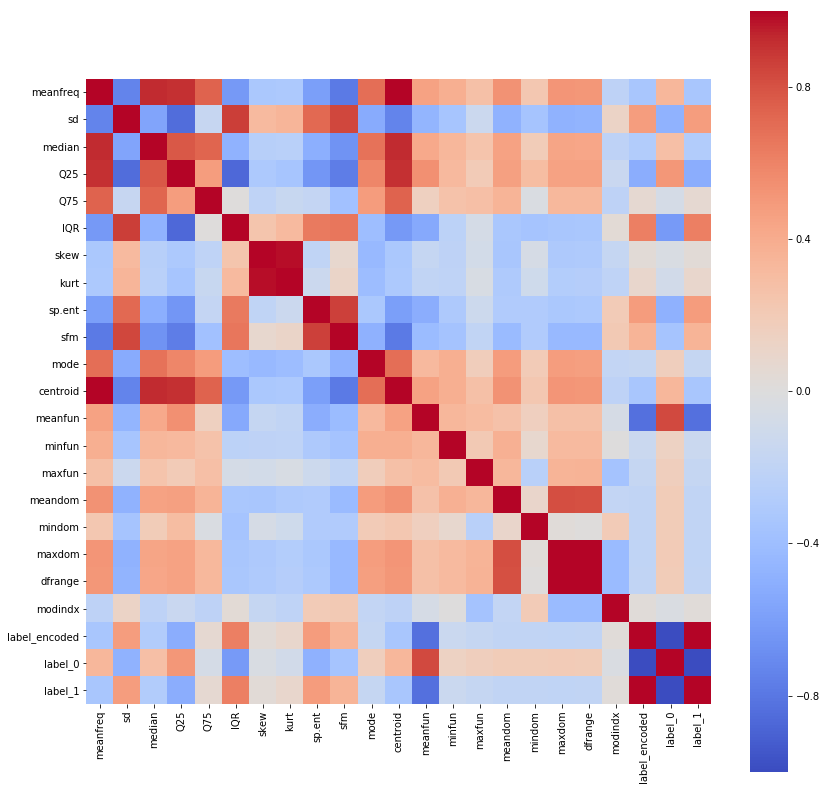

In [25]:
#Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. 
#Plot the correlation matrix using seaborn heatmap
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [29]:
#Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model
prediction_var = ['meanfreq', 'sd','median', 'Q25', 'Q75', 'IQR','sp.ent','sfm', 'skew', 'kurt']
train_X = train[prediction_var]# taking the training data input
train_y = train.label_encoded# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.label_encoded   #output value of test dat
logistic = LogisticRegression()
logistic.fit(train_X,train_y)
temp=logistic.predict(test_X)
print(metrics.accuracy_score(temp,test_y)) # to check the accuracy

0.88643533123
